# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 3. Линейная регрессия.


**Правила, <font color="red">прочитайте внимательно</font>:**




* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.


**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографиями в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив их как файл (`pdf`/`png`/`jpg`) боту вместе с ноутбуком
    * *или* вставив ее в ноутбук посредством `Edit -> Insert Image` при редактировании markdown-ячейки (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). **<font color="red">Неправильно вставленные фотографии могут не передаться при отправке.</font>** Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 20 баллов
* Задача 2 &mdash; 80 баллов

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 3 &mdash; 50 баллов
* Задача 4 &mdash; 60 баллов
* Задача 5 &mdash; 30 баллов


In [ ]:
# Bot check

# HW_ID: fpmi_ad3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')

При решении задания используйте `sklearn`. Пропишите сюда необходимые импорты

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn import metrics

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 1.

Рассмотрим одномерную линейную регрессию без свободного параметра $y(x) = \theta x$, где $x\in \mathbb{R}$ и $\theta \in \mathbb{R}$. Предполагаем, что данные получены по правилу
$$Y_i = \theta x_i + \varepsilon_i,$$
где $i \in \{1, ..., n\}$, числа $x_i \in \mathbb{R}$ неслучайны, а $\varepsilon_i$ &mdash; случайные ошибки.

**1.** Посчитайте оценку $\widehat{\theta}$ методом наименьших квадратов по явной формуле.

**2.** Выпишите формулы итераций градиентного спуска (GD) и стохастического градиентного спуска (SGD) для поиска $\widehat{\theta}$. Не забудьте указать, как в SGD математически определяется батч (набор объектов на каждой итерации).


*Замечания.*
1. В ответе во всех пунктах могут оставаться суммы $n$ слагаемых, но не должно быть операций с векторами или матрицами.
2. **Прочитайте требования к формату решения в правилах сдачи задания.**

---
### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; зима, 2 &mdash; весна, 3 &mdash; лето, 4 &mdash; осень;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [94]:
columns = ["season", "mnth", "holiday", "weekday", "workingday", "weathersit", "temp", "atemp", "hum", "windspeed", "cnt"]
df = pd.read_csv("day.csv", usecols=columns)

train, test = train_test_split(df, test_size=0.2)
train

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
668,4,10,0,2,1,2,0.318182,0.309909,0.825455,0.213009,1096
5,1,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,1606
664,4,10,0,5,1,2,0.545833,0.522750,0.807083,0.132467,7444
176,3,6,0,0,0,1,0.680000,0.637629,0.513333,0.094533,5305
574,3,7,0,6,0,1,0.755833,0.697604,0.613333,0.157350,6685
...,...,...,...,...,...,...,...,...,...,...,...
670,4,11,0,4,1,2,0.365833,0.369942,0.581667,0.157346,5986
32,1,2,0,3,1,2,0.260000,0.254417,0.775417,0.264308,1526
663,4,10,0,4,1,2,0.550000,0.529688,0.800417,0.124375,7359
608,3,8,0,5,1,1,0.764167,0.689400,0.587500,0.168533,7350


Выделим категории признаков

In [95]:
categorial_features = ["season", "mnth", "holiday", "weekday", "workingday", "weathersit"]
real_features = ["temp", "atemp", "hum", "windspeed"]
target_feature = "cnt"

#### 1. Визуальный анализ

Посмотрите по графикам, как *целевой признак зависит от остальных* и поймите характер этой зависимости. Старайтесь строить информативные графики, а из финального решения убирать те, которые не пригодились.

Какие признаки категориальные, а какие &mdash; вещественные? Учтите это при построении информативных графиков.

*Указание*. Среди признаков есть такие, значения которых как-то упорядочены, и их относительно небольшое количество. Чтобы понять, являются ли они категориальными, попробуйте понять, как с их значениями будут работать линейные модели. Иначе говоря, допустимо ли с точки зрения природы данных выполнять арифметические операции между *любыми* значениями этого признака, согласуется ли это со смыслом, который несет в себе данный признак?

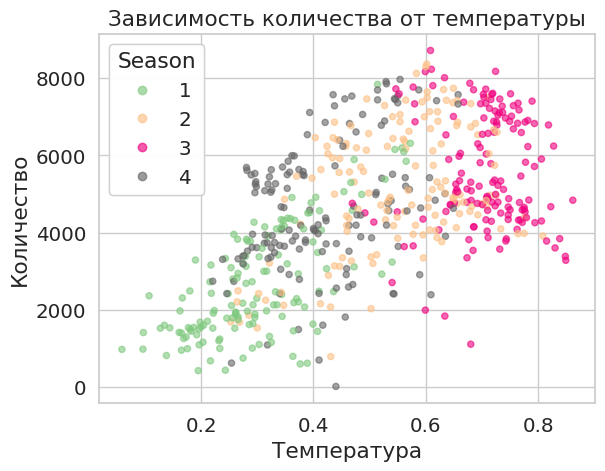

In [96]:
fig, ax = plt.subplots()

scatter = ax.scatter(train.temp, train.cnt, c=train.season, s=20, cmap='Accent', alpha=0.6)
legend = ax.legend(*scatter.legend_elements(), title="Season")
ax.add_artist(legend)
plt.title("Зависимость количества от температуры")
plt.xlabel("Температура")
plt.ylabel("Количество")
plt.show()

Из графика видно, что количество сданных в аренду велосипедов практически линейно зависит от температуры. Независимо от сезона

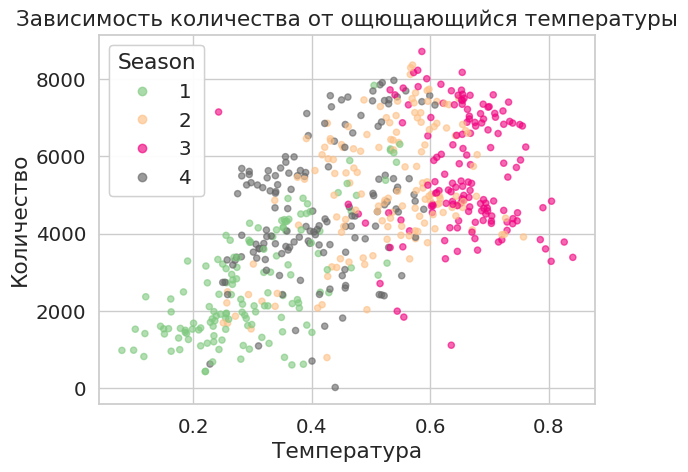

In [97]:
fig, ax = plt.subplots()

scatter = ax.scatter(train.atemp, train.cnt, c=train.season, s = 20, cmap='Accent', alpha=0.6)
legend = ax.legend(*scatter.legend_elements(), title="Season")
ax.add_artist(legend)
plt.title("Зависимость количества от ощющающийся температуры")
plt.xlabel("Температура")
plt.ylabel("Количество")
plt.show()

Из графика видно, что количество сданных в аренду велосипедов практически линейно зависит от температуры по ощущениям. Независимо от сезона

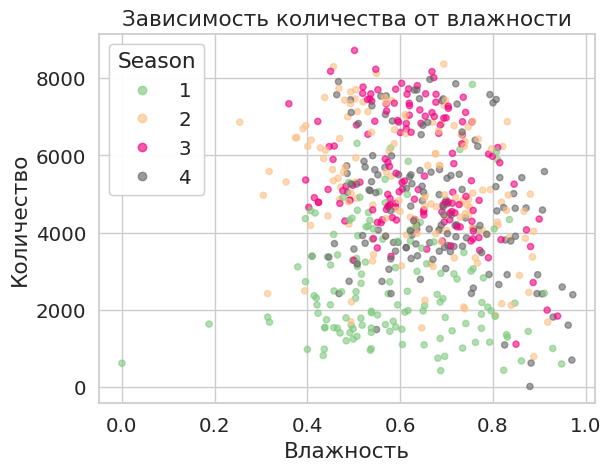

In [98]:
fig, ax = plt.subplots()

scatter = ax.scatter(train.hum, train.cnt, c=train.season, s = 20, cmap='Accent', alpha=0.6)
legend = ax.legend(*scatter.legend_elements(), title="Season")
ax.add_artist(legend)
plt.title("Зависимость количества от влажности")
plt.xlabel("Влажность")
plt.ylabel("Количество")
plt.show()

Из графика вден тренд на то, что количество сданных в аренду велосипедов падает линейно от увеличения ветра в рамках каждого сезона (конечно этот фактор не так заметен, как от температуры, но заметен).

Text(0.5, 1.0, 'Количество от месяца')

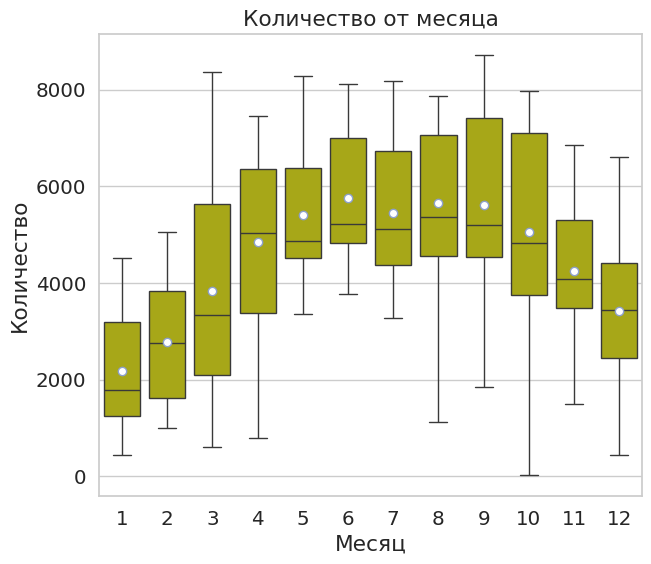

In [99]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=train, x="mnth", y="cnt", showmeans=True, meanprops={'marker': 'o', 'markerfacecolor': 'white'}, color='y')
plt.xlabel("Месяц")
plt.ylabel("Количество")
plt.title("Количество от месяца")

По диаграмме видно, что месяцы в середине года пользуются большей популярностью по количеству в среднем, чем месяцы не в середине (это связано с тем, что в середине года теплее)

Проверим с помощью Boxplot выбросы

Text(0.5, 1.0, 'Количество от месяца')

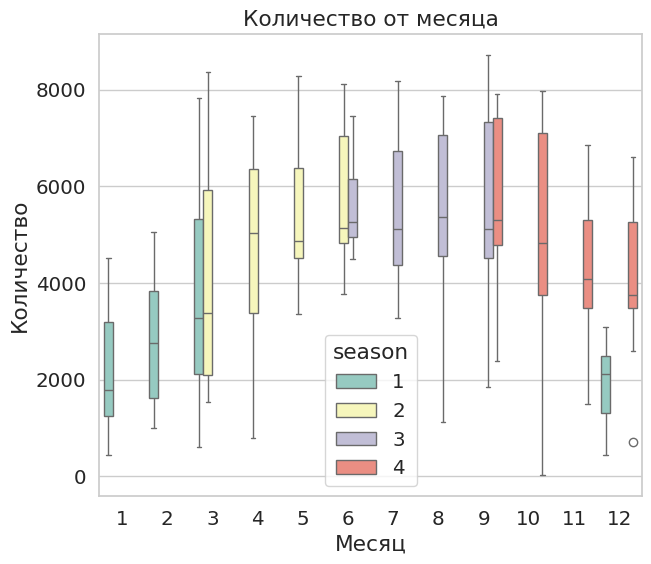

In [100]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=train, x="mnth", y="cnt", hue="season", palette='Set3')
plt.xlabel("Месяц")
plt.ylabel("Количество")
plt.title("Количество от месяца")

Видно, что сезон может быть перепутан, поэтому лучше пользоваться месяцами

Text(0.5, 1.0, 'Количество от дня недели')

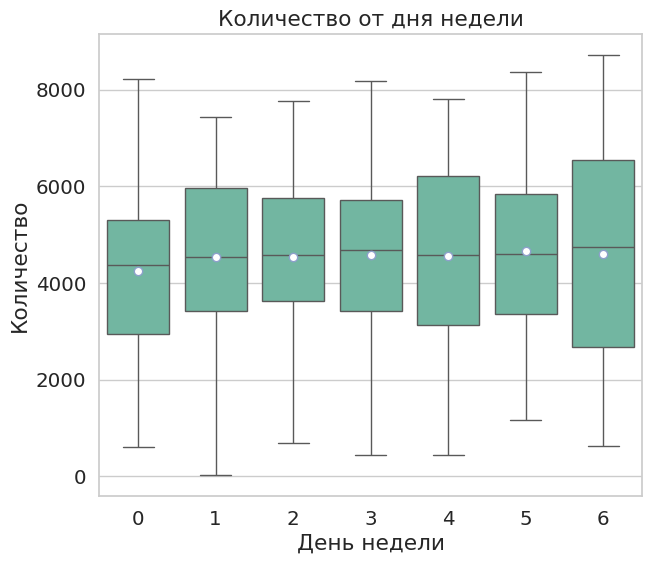

In [101]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=train, x="weekday", y="cnt", showmeans=True, meanprops={'marker': 'o', 'markerfacecolor': 'white'})
plt.xlabel("День недели")
plt.ylabel("Количество")
plt.title("Количество от дня недели")

В среднем число велосипедов, сданных в ареду не зависит от дня недели

Text(0.5, 1.0, 'Количество от того, насколько хорошая погода')

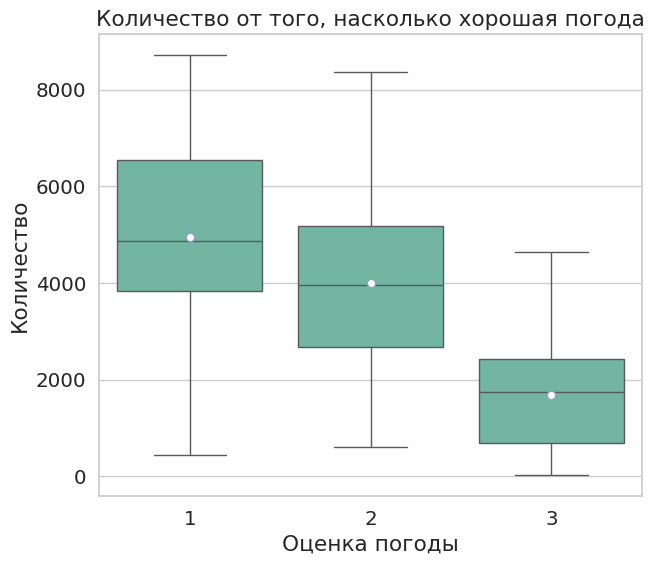

In [102]:
plt.figure(figsize=(7, 6))
sns.boxplot(data=train, x="weathersit", y="cnt", showmeans=True, meanprops={'marker': 'o', 'markerfacecolor': 'white'})
plt.xlabel("Оценка погоды")
plt.ylabel("Количество")
plt.title("Количество от того, насколько хорошая погода")

Можно сделать вывод: чем лучше погода, тем большее количество велосипедов сдается (это довольно логично)

Text(0.5, 1.0, 'Количество от того, праздничный день или нет')

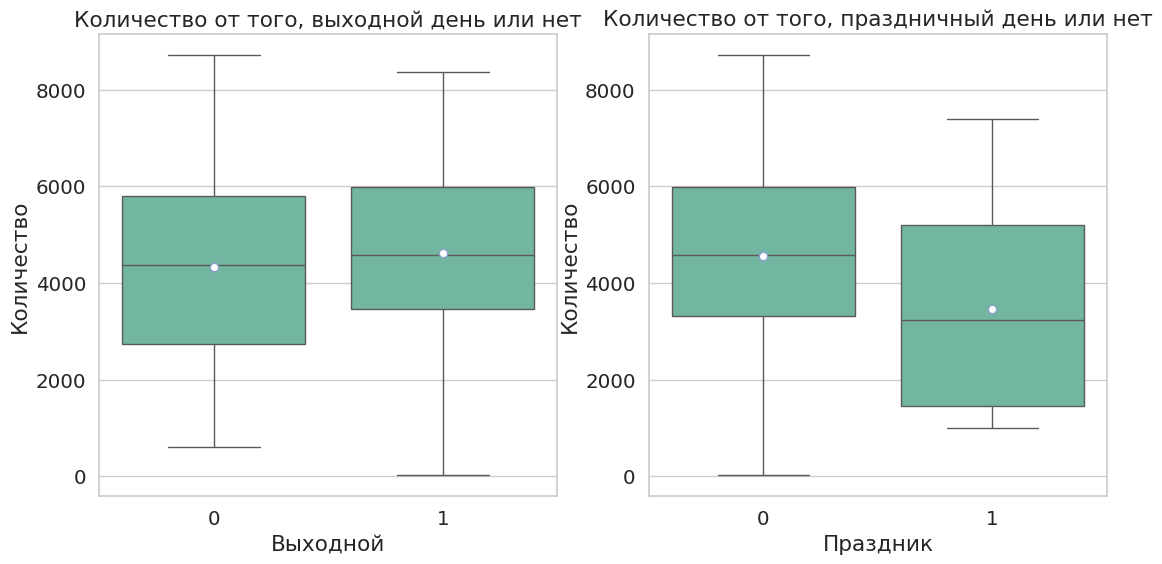

In [103]:
plt.figure(figsize=(13, 6))

plt.subplot(121)
sns.boxplot(data=train, x="workingday", y="cnt", showmeans=True, meanprops={'marker': 'o', 'markerfacecolor': 'white'})
plt.xlabel("Выходной")
plt.ylabel("Количество")
plt.title("Количество от того, выходной день или нет")

plt.subplot(122)
sns.boxplot(data=train, x="holiday", y="cnt", showmeans=True, meanprops={'marker': 'o', 'markerfacecolor': 'white'})
plt.xlabel("Праздник")
plt.ylabel("Количество")
plt.title("Количество от того, праздничный день или нет")

Количество в среднем не зависит от того выходной день или нет, но в праздники в среднем велосипеды в прокат берут меньше, чем в другие дни

Сделайте выводы по графикам. В частности, ответьте на следующие вопросы.
* Есть ли в данных явные выбросы, то есть точки, далеко находящиеся от основной массы точек?
* Стоит ли рассматривать какие-либо нелинейные функции от признаков? Не стоит придумывать сложные функции, достаточно рассмотреть $x^2$, $\log x$ и $I\{x > c\}$.



**Выводы по графикам:** В данных присутствуют выбросы, это очень хорошо заметно на первых трех графиках, есть точки, которые очень далеко находятся от общей массы точек по своему сезону. Так же присутствуют ошибки в нумерации сезонов, некоторые данные неправильно соотнесены между месяцем и сезоном. Признак сезоны поэтому можно не использовать или исправить. Рассматривать нелинейные функции от признаков нет смысла рассматривать, так как по всем вещественным признакам, где есть зависимость можно увидеть хорошую линейную зависимость

#### 2. Подготовка данных

Опишите по шагам процедуру предобработки данных, которая будет включать работу с выбросами, преобразования вещественных и категориальных признаков, возможно, что-то еще. *Обратите внимание, от того, насколько качественно вы проведете визуальный анализ и подготовку данных, будет зависеть качество ваших моделей на следующих шагах.*

**Процедура предобработки данных:**

**a).** Сначала убираем столбцы. Удалим столбец seasons так как в нем много ошибок, а так же он однозначно восстанавливается по столбцу mnth. Удалим столбец atemp так как он мало отличается от temp. Так же удалим столбец workingday так как он восстанавливается по weekday и holiday

**b).** Обработаем выбросы: по одному из определений выбросом можно считать любую точка данных, что располагается не в пределах 2.5-3 нормальных отколнениях (https://www.codecamp.ru/blog/outliers-excel/?ysclid=ltg82zxkr8946425578). Возьмем 2.75. Поэтому сгрупируем данные по месяцам и обработаем выбросы в рамках каждого месяца

**c).** Преобразуем категориальные признаки с помощью one hot encoding

Стандартизировать данные не будем так как они уже отнормированы

Реализуйте данную процедуру.

In [104]:
del train["season"]
del train["atemp"]
del train["workingday"]
categorial_features.remove("season")
categorial_features.remove("workingday")
real_features.remove("atemp")

In [105]:
def emissions_check(train):
    months = train.groupby("mnth")

    for month, group in months:
        std = group.std()
        mean = group.mean()
        for feature in real_features:
            train.drop(train.loc[(train.mnth == month) & (np.abs(train[feature] - mean[feature]) > 2.75 * std[feature])].index, inplace=True)
    return train

In [106]:
def encode(train):
    encoder = OneHotEncoder(drop='first', sparse=False)  # объявляем модель
    train_cat = encoder.fit_transform(train[categorial_features])  # обучаем и кодируем
    return train_cat

In [107]:
train = emissions_check(train)
train_cat = encode(train)
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(576, 23)

#### 3. Обучение модели и ее анализ

Обучите линейную регрессию из `sklearn` на полученных данных и посмотрите на полученные оценки коэффициентов (в т.ч. свободный коэффициент).

In [108]:
model = LinearRegression(fit_intercept=True)  # объявляем модель
model.fit(X_train, train[target_feature])  # обучаем


LinearRegression()

In [109]:
model.coef_

array([ 6970.16159004, -3254.9859132 , -3939.06950403,   176.82499864,
         742.47972729,  1051.84531241,   866.88846468,   312.81496144,
        -672.54325564,   202.41607505,  1245.04114522,  1630.06497153,
        1286.10972474,   845.28290841, -1213.45799164,   372.52167348,
         353.92728517,   367.89582567,   303.84185165,   360.20906123,
         554.51843621,  -253.17771948, -2228.330429  ])

In [111]:
model.intercept_

3080.8538293603315

Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики.

In [112]:
test_cat = encode(test)
X_test = np.hstack([test[real_features], test_cat])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [113]:
test_preds = model.predict(X_test)

In [114]:
print("RMSE", metrics.mean_squared_error(test[target_feature], test_preds) ** 0.5)
print("MAE", metrics.mean_absolute_error(test[target_feature], test_preds))
print("MAPE", metrics.mean_absolute_percentage_error(test[target_feature], test_preds))

RMSE 1393.434881962243
MAE 1219.1889591915185
MAPE 0.39381027397605106


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. Не забудьте про константный признак. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

Проблемы нет! Она могла бы возникнуть, если бы были данные были линейнозависимыми, но мы избежали этого, убрав линейно зависимые столбцы в датафрейме. Это могло бы привести к тому, что матрица $X^TX$ была близка к нулевой, из за чего $(X^TX)^{-1}$ получила бы неадекватно огромные значения

Формула: $$\widehat{\theta} = (X^TX)^{-1}X^TY$$

In [115]:
X = np.insert(X_train, X_train.shape[1], 1, axis=1)
Y = train[target_feature]

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [116]:
Theta = np.linalg.inv(X.T @ X) @ X.T @ Y
Theta

array([ 6970.16159004, -3254.9859132 , -3939.06950403,   176.82499864,
         742.47972729,  1051.84531241,   866.88846468,   312.81496144,
        -672.54325564,   202.41607505,  1245.04114522,  1630.06497153,
        1286.10972474,   845.28290841, -1213.45799164,   372.52167348,
         353.92728517,   367.89582567,   303.84185165,   360.20906123,
         554.51843621,  -253.17771948, -2228.330429  ,  3080.85382936])

*Сделайте* выводы.

Коэффициенты, посчитанные по формуле и с помощью линейной регрессии совпадают это значит, что все работает

**Выводы:** Как несложно заметить больше всего модель зависит от числовых признаков и свободного коэффициента. Из категориальных признаков большей вклад дает weathersit

*Замечание.* Не расстраивайтесь, если у вас получится не очень хорошее качество, это нормально. Вы провели только небольшую предобработку данных и обучили *простую* модель. Более сложные методы обработки данных и обучения ждут вас впереди. Главное &mdash; с чего-то начать!

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру *регуляризации* в модели.

Пусть $X \in \mathbb{R}^{n \times d}$ &mdash; матрица признаков, $Y \in \mathbb{R}^{n}$ &mdash; вектор значений целевого признака, $\theta \in \mathbb{R}^{d}$ &mdash; неизвестный вектор параметров. В методе наименьших квадратов решается задача
$$\| Y - X\theta \|^2 \longrightarrow \min_\theta.$$
Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. Тем самым решается задача
$$\| Y - X\theta \|^2 + \lambda \| \theta \|^2 \longrightarrow \min_\theta,$$
где $\lambda > 0$ &mdash; гиперпараметр модели, то есть число, которое задается пользователем. Такая модель называется **Ridge-регрессией**.

*Замечание.* Такая модель дает некоторое *другое приближение* неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только *более качественное приближение* согласно выбранной метрике, например, RMSE.

**1.** Найдите оценку $\theta$ в модели ridge-регрессии в матричном виде. Сравните ее с оценкой коэффициентов в методе наименьших квадратов. Помогает ли она избавиться от проблемы обратимости матрицы в МНК, которая обсуждалась на занятии?

**2.** Выпишите формулу поиска оценки коэффициентов методом *градиентного спуска* и *стохастического градиентного спуска* для модели ridge-регрессии в матричном виде. Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

**3.** Многие модели машинного обучения требуют *стандартизацию признаков*. Существует множество различных способов стандартизации, из которых наиболее распространены два следующих.
1. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html"><it>StandardScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ &mdash; выборочное среднее значение признака $j$ (функция `np.mean`), а $s^2_j$ &mdash; выборочную дисперсию признака $j$ (функция `np.var`). Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{s_j}.$$
2. <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html"><it>MinMaxScaler</it></a>. Пусть $x_{ij}$ &mdash; значение признака $j$ для объекта $i$. Обозначим $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ соответственно. Тогда стандартизацией является преобразование
$$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}.$$

Для метода наименьших квадратов стандартизацию признаков можно не производить, однако для модели ridge-регрессии стандартизация необходима. Поясните это. Можно представить, что признаки имеют некоторые различные единицы измерения.

---
### Задача 4.

В данной задаче мы продолжим анализировать данные велопроката из задачи 2, используя указанные в ней признаки.

Для начала реализуйте класс для работы с моделью ridge-регрессии, используя явную формулу из предыдущей задачи. Интерфейс этого класса соответствует стандарту библиотеки `sklearn`, который использует также множество других библиотек.

In [17]:
class RidgeRegression:
    def __init__(self, lambd=0.1, fit_intercept=True):
        '''
        Инициализация модели.

        Аргументы:
        lambd -- параметр регуляризации.
        fit_intercept -- добавить ли константный признак.
        '''

        self.lambd = lambd
        self.fit_intercept = fit_intercept


    def fit(self, X, Y):
        '''
        Обучение модели ridge-регрессии.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);
        Y -- numpy-вектор значений целевого признака размера (n,).
        '''
        if self.fit_intercept:
            X = np.insert(X, X.shape[1], 1, axis=1)
        self.Theta = np.linalg.inv(X.T @ X + self.lambd * np.eye(X.shape[1])) @ X.T @ Y
        return self


    def predict(self, X):
        '''
        Вычисление предсказаний.

        Аргументы:
        X -- numpy-матрица объект-признак размера (n, d);

        Возвращает:
        predictions -- предсказания в виде numpy-вектора размера (n,).
        '''

        if self.fit_intercept:
            X = np.insert(X, X.shape[1], 1, axis=1)
        predictions = X @ self.Theta

        return predictions

Разделите данные на три части &mdash; обучающую, валидационную и тестовую в соотношении 3:1:1. На первой из них вам необходимо проводить всю аналитику и обучать все модели &mdash; регрессию, скалирование и т.д.. Вторую вы будете использовать для выбора оптимального значения гиперпараметра. Наконец, тестовую выборку необходимо использовать только для вычисления итогового значения метрик выбранной модели. Именно эти числа вам нужно говорить заказчику.

Подробнее посмотрите в <a href="https://miptstats.github.io/courses/ad_fivt/lecture3_3.pdf">презентации</a> с занятия. Далее в данной задаче можно копировать код из предыдущих задач или использовать готовые инструменты.

In [47]:
train, tmp = train_test_split(df, test_size=0.4)
valid, test = train_test_split(tmp, test_size=0.5)
valid

,season,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
34,1,2,0,5,1,2,0.211304,0.228587,0.585217,0.127839,1708
694,4,11,0,0,0,1,0.245833,0.257583,0.468333,0.150500,2424
576,3,7,0,1,1,1,0.730833,0.684987,0.668750,0.153617,7105
135,2,5,0,1,1,1,0.577500,0.550512,0.787917,0.126871,3958
323,4,11,0,0,0,2,0.463333,0.457058,0.684583,0.185950,3520
...,...,...,...,...,...,...,...,...,...,...,...
44,1,2,0,1,1,1,0.415000,0.398350,0.375833,0.417908,1913
49,1,2,0,6,0,1,0.399167,0.391404,0.187917,0.507463,1635
58,1,2,0,1,1,2,0.407273,0.400118,0.876364,0.289686,1446
113,2,4,0,0,0,2,0.581667,0.551763,0.810833,0.192175,4191


Выполните необходимые преобразования признаков. Не забудьте, что <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#2.-Обучение">обучить преобразования</a> нужно только по обучающей выборке. Учтите все особенности, которые обсуждались ранее во второй задаче.

In [48]:
train = emissions_check(train)
train_cat = encode(train)
X_train = np.hstack([train[real_features], train_cat])
X_train.shape

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(438, 23)

Определите сетку значений гиперпараметра $\lambda$ и обучите для каждого значения сетки модель ridge-регрессии. Обычно эффективнее брать сетку в логарифмическом масштабе, воспользовавшись `np.logspace`.

In [49]:
lambdas = np.logspace(-6, 6, 150)

Для каждой из них посчитайте ошибку по метрикам RMSE, MAE, MAPE по обучающей и валидационной выборкам. Подробнее можно почитать в <a href="https://miptstats.github.io/courses/ad_fivt/linreg_sklearn.html#3.-Тестирование-и-оценка-качества">ноутбуке</a> с занятия.

*Замечание.* Если в тестовой части тоже есть "большие" выбросы, их стоит убрать. Наша модель не должна пытаться их предсказать (например, сбои в работе сервиса) но в то же время выбросы вносят существенный вклад в значение метрики.

In [50]:
models = []
for lambda_ in lambdas:
    model = RidgeRegression(lambda_)
    model.fit(X_train, train[target_feature])
    models.append(model)

Для каждой метрики постройте графики зависимости значений метрики от значения гиперпараметра. Сравните поведение значений метрик для обучающей и валидационной выборок.

In [51]:
RMSE_train = []
RMSE_valid = []
MAE_train = []
MAE_valid = []
MAPE_train = []
MAPE_valid = []

valid_cat = encode(valid)
X_valid = np.hstack([valid[real_features], valid_cat])

for model in models:
    train_pred = model.predict(X_train)
    valid_pred = model.predict(X_valid)
    RMSE_train.append(metrics.mean_squared_error(train[target_feature], train_pred) ** 0.5)
    RMSE_valid.append(metrics.mean_squared_error(valid[target_feature], valid_pred) ** 0.5)
    MAE_train.append(metrics.mean_absolute_error(train[target_feature], train_pred))
    MAE_valid.append(metrics.mean_absolute_error(valid[target_feature], valid_pred))
    MAPE_train.append(metrics.mean_absolute_percentage_error(train[target_feature], train_pred))
    MAPE_valid.append(metrics.mean_absolute_percentage_error(valid[target_feature], valid_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


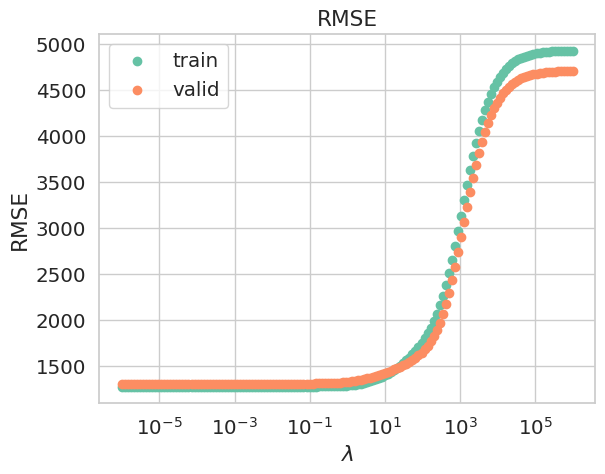

In [52]:
plt.figure()
plt.scatter(lambdas, RMSE_train, label="train")
plt.scatter(lambdas, RMSE_valid, label="valid")
plt.xscale('log')
plt.title("RMSE")
plt.xlabel("$\lambda$")
plt.ylabel("RMSE")
plt.legend()
plt.show()

По графику видим, как при маленьких $\lambda$ RMSE почти не меняется и имеет значение почти как для МНК. Потом в районе $\lambda$=10 RMSE начинает расти и при $\lambda$=10^4 выходит на плато, которое зависит только от суммы квадратов коэффициентов (если судить по формуле)

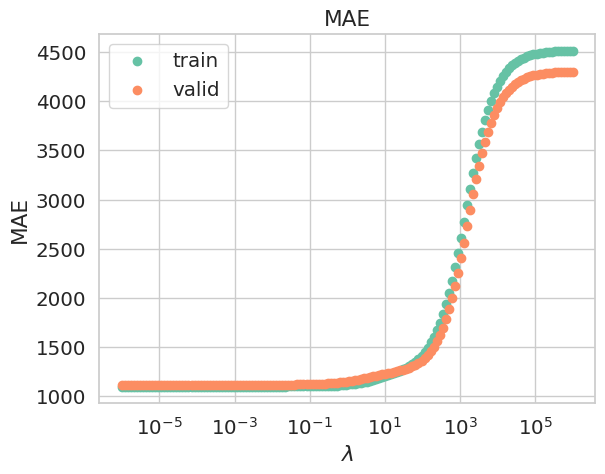

In [53]:
plt.figure()
plt.scatter(lambdas, MAE_train, label="train")
plt.scatter(lambdas, MAE_valid, label="valid")
plt.xscale('log')
plt.title("MAE")
plt.xlabel("$\lambda$")
plt.ylabel("MAE")
plt.legend()
plt.show()

Аналогично RMSE

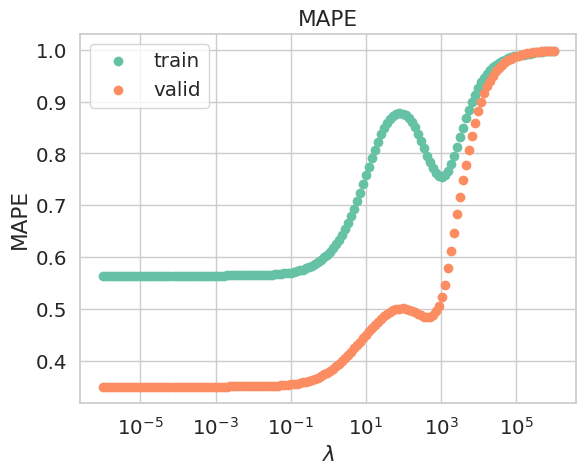

In [54]:
plt.figure()
plt.scatter(lambdas, MAPE_train, label="train")
plt.scatter(lambdas, MAPE_valid, label="valid")
plt.xscale('log')
plt.title("MAPE")
plt.xlabel("$\lambda$")
plt.ylabel("MAPE")
plt.legend()
plt.show()

Видно, что при больших $\lambda$ качество хуже, чем при маленьких

Постройте также на одном графике кривые зависимости значений оценок коэффициентов от значений гиперпараметра. Какая наблюдается зависимость? Как вы это можете охарактеризовать?

*Замечание*. Возможно, будет информативнее рисовать графики в логарифмическом масштабе. Для наглядности можно также попробовать рисовать одним цветом все кривые, которые относятся к одному *исходному* признаку.

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


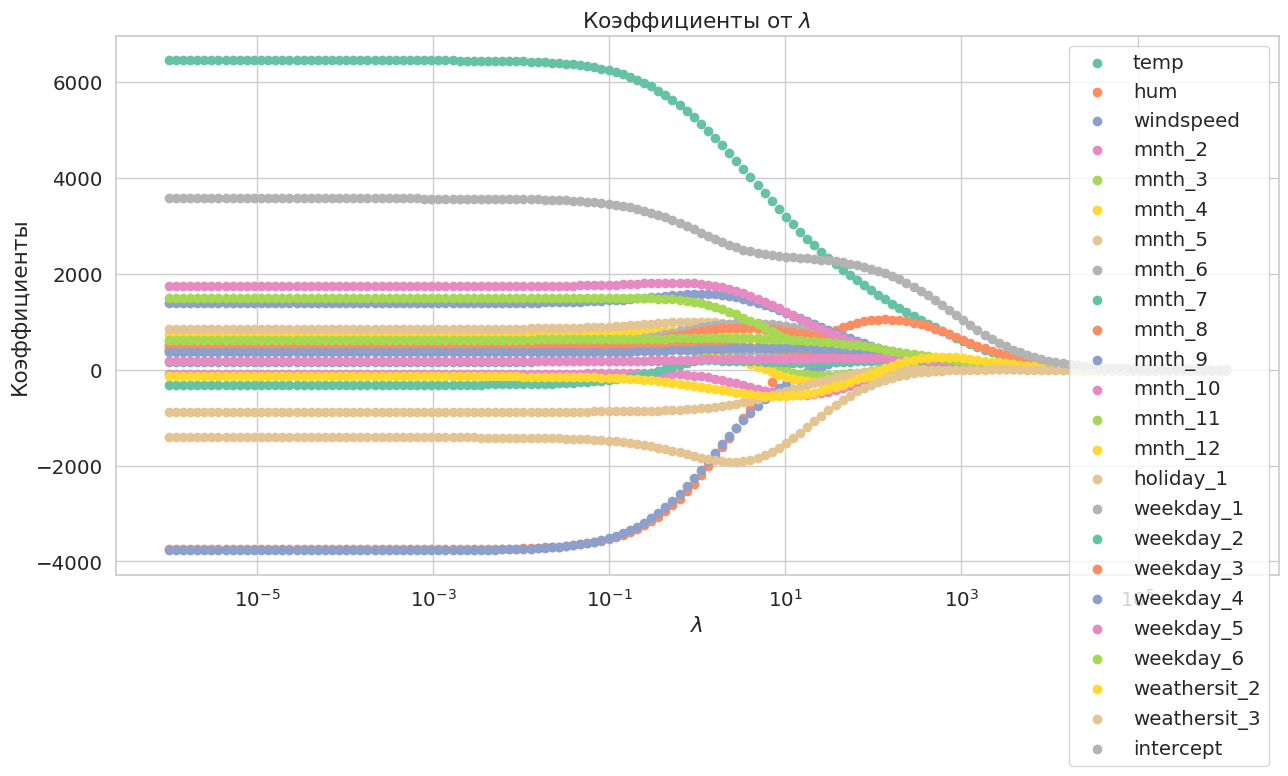

In [55]:
encoder = OneHotEncoder(drop="first", sparse = True)
cat = encoder.fit_transform(train[categorial_features])
coefs = pd.DataFrame([model.Theta for model in models])
coefs.columns = np.hstack([real_features, encoder.get_feature_names_out(), ["intercept"]])
plt.figure(figsize=(15, 7))
for col in coefs.columns:
    plt.scatter(lambdas, coefs[col], label=col)
    plt.xscale('log')
plt.title("Коэффициенты от $\lambda$")
plt.xlabel("$\lambda$")
plt.ylabel("Коэффициенты")
plt.legend()
plt.show()

Выберите оптимальное значение гиперпараметра и посчитайте ошибку на тестовой выборке.

Возьмем $\lambda$ = 0.1, так как при $\lambda$ меньших 0.1 качество моделей почти не меняется, но при $\lambda$ = 0.1 модули коэффициентов не такие большие, как при меньших $\lambda$

In [56]:
model = RidgeRegression(0.01)
model.fit(X_train, train[target_feature])
test_cat = encode(test)
X_test = np.hstack([test[real_features], test_cat])

test_pred = model.predict(X_test)
print("RMSE", metrics.mean_squared_error(test[target_feature], test_pred) ** 0.5)
print("MAE", metrics.mean_absolute_error(test[target_feature], test_pred))
print("MAPE", metrics.mean_absolute_percentage_error(test[target_feature], test_pred))

RMSE 1309.0148721777505
MAE 1119.7676769762354
MAPE 0.3595033540606264


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Сделайте выводы.

**Вывод:** при малых lambda получаются самые лучшие предсказания. При них получается ответ достаточно близкий к решению по формуле метода наименьших квадратов, который в нашей задаче работает так как матрица не близка к линейнозависимой

---
### Задача 5.

Предположим, что имеющиеся у нас данные по велопрокату &mdash; большие данные. Конечно же в реальности это не так. Однако, для простой учебной задачи это в самый раз, чтобы ничего ни у кого не подвисало.

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.

In [57]:
Theta = np.zeros(X_train.shape[1]+1)

Реализуйте самостоятельно процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели ridge-регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256. Значение $\lambda$ можно взять из предыдущей задачи.

Обратите внимание, что при неудачном выборе величины шага градиентного спуска $\eta$ (learning rate) метод может не сойтись. Пример приводился на лекции.

In [62]:
lambda_ = 0.1
def SGDRidgeRegression(X, Y, Theta, lambd=0.1, lr=0.0005, steps=1000, batch_size=256):
    Thetas = []
    Thetas.append(Theta)
    for i in range(steps):
        batch_ganerate = np.random.choice(X.shape[0], batch_size)
        X_new = X[batch_ganerate]
        Y_new = Y[batch_ganerate]
        Theta = Theta - lr * (X_new.T @ (X_new @ Theta - Y_new) + lambd * Theta)
        Thetas.append(Theta)
    return Thetas

Нарисуйте графики зависимости значений метрик RMSE, MAE, MAPE от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?

In [59]:
X_train = np.insert(X_train, X_train.shape[1], 1, axis=1)
X_valid = np.insert(X_valid, X_valid.shape[1], 1, axis=1)
X_test = np.insert(X_test, X_test.shape[1], 1, axis=1)
print(X_train.shape, X_valid.shape, X_test.shape)

(438, 24) (146, 24) (147, 24)


In [63]:
all_step = 4000
Thetas = SGDRidgeRegression(X_train, train[target_feature].to_numpy(), Theta, steps=all_step, batch_size = 128)

In [65]:
RMSE_train = []
RMSE_valid = []
MAE_train = []
MAE_valid = []
MAPE_train = []
MAPE_valid = []

for step in range(all_step):
    train_pred = X_train @ Thetas[step]
    valid_pred = X_valid @ Thetas[step]
    RMSE_train.append(metrics.mean_squared_error(train[target_feature], train_pred) ** 0.5)
    RMSE_valid.append(metrics.mean_squared_error(valid[target_feature], valid_pred) ** 0.5)
    MAE_train.append(metrics.mean_absolute_error(train[target_feature], train_pred))
    MAE_valid.append(metrics.mean_absolute_error(valid[target_feature], valid_pred))
    MAPE_train.append(metrics.mean_absolute_percentage_error(train[target_feature], train_pred))
    MAPE_valid.append(metrics.mean_absolute_percentage_error(valid[target_feature], valid_pred))

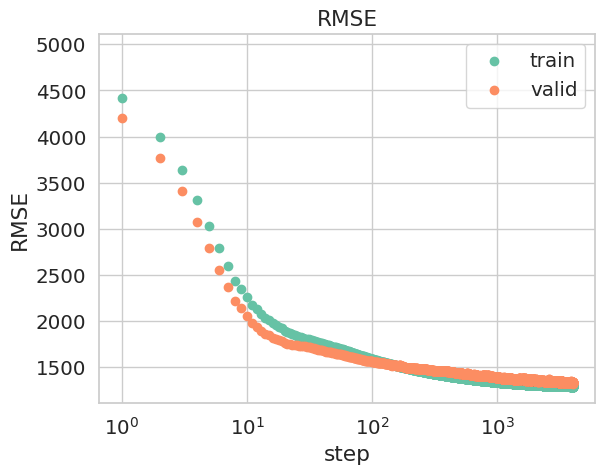

In [77]:
plt.figure()
plt.scatter(x=range(4000), y=RMSE_train, label="train")
plt.scatter(x=range(4000), y=RMSE_valid, label="valid")
plt.xscale('log')
plt.title("RMSE")
plt.xlabel("step")
plt.ylabel("RMSE")
plt.legend()
plt.show()

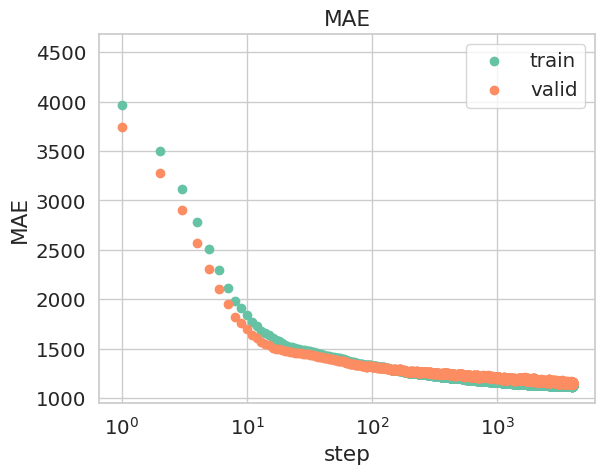

In [79]:
plt.figure()
plt.scatter(x=range(4000), y=MAE_train, label="train")
plt.scatter(x=range(4000), y=MAE_valid, label="valid")
plt.xscale('log')
plt.title("MAE")
plt.xlabel("step")
plt.ylabel("MAE")
plt.legend()
plt.show()

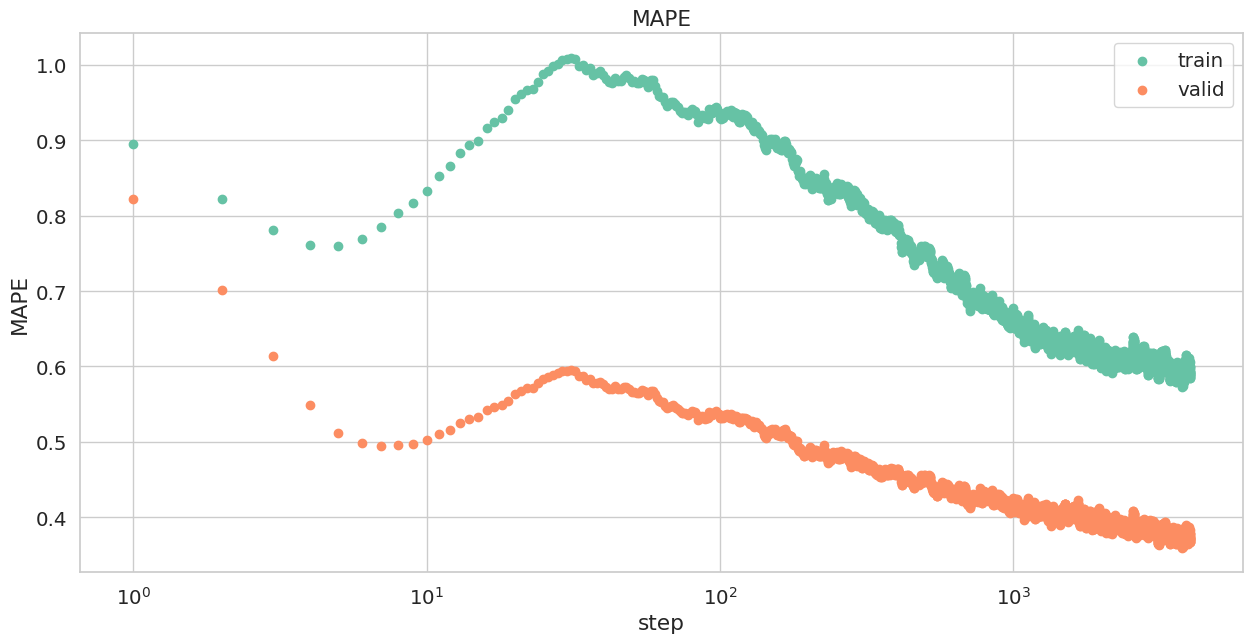

In [81]:
plt.figure(figsize=(15, 7))
plt.scatter(x=range(4000), y=MAPE_train, label="train")
plt.scatter(x=range(4000), y=MAPE_valid, label="valid")
plt.xscale('log')
plt.title("MAPE")
plt.xlabel("step")
plt.ylabel("MAPE")
plt.legend()
plt.show()

Посчитайте ошибку на тестовой выборке.

In [85]:
test_pred = X_test @ Thetas[all_step]
print("RMSE", metrics.mean_squared_error(test[target_feature], test_pred) ** 0.5)
print("MAE", metrics.mean_absolute_error(test[target_feature], test_pred))
print("MAPE", metrics.mean_absolute_percentage_error(test[target_feature], test_pred))

RMSE 1301.1272528608952
MAE 1128.6293404488006
MAPE 0.3498280076957287


**Вывод:** Ошибки, полученные при SGD примерно такие же, как и при ridge-регрессии, а значит, что градиентным спуском можно пользоваться и будет неплохо получаться. Но это только в том случае, если правильно подобрать $\eta$, иначе GD может не сойтись и результаты будут очень печальные (никакие). Так же стоит отметить, что для получения хорошего качества модели нужно посмотреть, сколько шагов сделает алгоритм, потому что в зависимости от выборки можно получить хороший результат уже через 10 шагов, а можно и через 1000, и от задачи конечно же это зависит